# **Etape 1 : EDA and cleaning**

## Description du problème
### Prévision des ventes en magasin de Walmart

Pour rendre leurs activités plus efficaces, les entreprises veulent prédire les ventes futures. La prévision des ventes aide : pour organiser les stocks, calculer les revenus et décider de réaliser de nouveaux investissements. Avec des prévisions précises, l’entreprise peut organiser son budget et décider de réaliser de nouveaux investissements/fermer des magasins ou de modifier sa politique de prix. Un autre avantage de connaître les ventes futures est que le fait d'atteindre des objectifs prédéterminés dès le début de la saison peut avoir un effet positif sur les cours des actions et sur la perception des investisseurs. En outre, ne pas atteindre l’objectif projeté pourrait, à l’inverse, nuire considérablement aux cours des actions.

Walmart a également commencé à recruter des concurrents sur Kaggle pour prédire les ventes des magasins en utilisant les données historiques des démarques. Dans le cadre de ce concours, les demandeurs d'emploi ont reçu des données historiques sur les ventes de 45 magasins Walmart (avec 81 rayons) situés dans différentes zones. En outre, les jours fériés et les événements de démarques ont été ajoutés aux données car ils affectent clairement les ventes.

### Objectif

Le but de ce notebook est la compréhension, la préparation et l’exploration des données. Dans ce notebook, je vais télécharger des données, fusionner différents ensembles de données et essayer de comprendre les interactions des colonnes les unes avec les autres et les cibler à l'aide de visualisations. Je découvrirai également quelles colonnes doivent être nettoyées. Ensuite, je préparerai mes données à la modélisation.

À la fin du notebook, toutes les explorations obtenues par le premier examen des données peuvent être trouvées sous forme de liste.

### Data Source

Source des données : Kaggle. 
Elles ont été collectées dans 45 magasins Walmart, de 2010 à 2012. Il existe 5 ensembles de données différents pour l'entraînement, le test, le format de soumission, les features et le store.

Après avoir fusionné tous les features, nous aurons : 421 570 lignes et 16 colonnes à analyser avant le nettoyage.

## Import des librairies nécessaires et data :

In [49]:
#import des librairies python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

Lecture des fichiers csv :

In [2]:
train_df = pd.read_csv('../data/train.csv')

In [3]:
stores_df = pd.read_csv('../data/stores.csv')

In [4]:
features_df = pd.read_csv('../data/features.csv')

## Première exploration des dataframes et merge des données

In [5]:
print(train_df.shape)
train_df.head()

(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
print(stores_df.shape)
stores_df.head()

(45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [7]:
print(features_df.shape)
features_df.head()

(8190, 12)


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Objectif : Combiner toutes les tables pour avoir un seul dataframe en résultat

- Centraliser les informations afin d'obtenir une vision globale sur la même ligne
- Faciliter l'analyse et la modélisation sur un unique DataFrame
- Pour entrainer le futur modèle de machine learning, on doit fournir un jeu de données complet avec toutes les variables pertinentes (features) alignées avec la cible (Weekly_Sales)

In [8]:
df = pd.merge(train_df, features_df, on=['Store', 'Date'], how='left')
df = pd.merge(df, stores_df, on='Store', how='left')
print(df.shape)
df.head()

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [23]:
df.rename(columns={"IsHoliday_x": "IsHoliday"}, inplace=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,A,151315


## Etude sur les colonnes

## Nombre de Store et Départements

In [9]:
df['Store'].nunique() # number of different values

45

In [10]:
df['Dept'].nunique() # number of different values

81

Désormais, nous allons voir la moyenne des ventes hebdomaraires pour chaque Store et pour chaque département pour voir s'il y a des valeurs étranges.
Il y a 45 Stores et 81 Départements.

In [11]:
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)

pd.set_option('display.max_columns', None)   # Afficher toutes les colonnes
pd.set_option('display.max_rows', None)      # Pour afficher toutes les lignes (optionnel)

display(store_dept_table)
store_dept_table.shape

Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

(45, 81)

Le nombre de store 1-45, et les departements de 1-99. Mais il y a des nombres manquants entre 1-99, on obtient bien 81 colonnes correspondantes à 81 départements. 

Depuis la table de pivot, on observe des valeurs aberrantes comme des valeurs négatives ou NaN. C'est impossible pour un magasin de faire des ventes negatives ou alors aucune vente de la semaine. Je vais donc changer ces valeurs.


In [12]:
df.loc[df['Weekly_Sales']<=0].shape

(1358, 17)

1358 lignes sur 421570 lignes au total, correspond à seulement 0.3%. Je vais donc supprimer et ignorer ces lignes qui contiennent des valeurs fausses de ventes.

In [13]:
df = df.loc[df['Weekly_Sales'] > 0]
df.shape

(420212, 17)

### Nettoyage des valeurs nulles

In [14]:
# Vérification du nombre de valeurs manquantes par colonne sur le DataFrame df
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270031
MarkDown2       309308
MarkDown3       283561
MarkDown4       285694
MarkDown5       269283
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [15]:
for col in ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']:
    df[col] = df[col].fillna(0)
    df[col] = df[col].fillna(0)

In [16]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64

On a remplacé les valeurs null par 0 dans les colonnes Markdown car null signifie qu'il n'y a pas eu de promotions, donc cela revient à 0.

## Colonne Date

In [20]:
df['Date'].head(5).append(df['Date'].tail(5)) # to see first and last 5 rows.

/var/folders/fj/s52dxk7d5zv73fvl_rwf3vgc0000gn/T/ipykernel_8039/4262877864.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df['Date'].head(5).append(df['Date'].tail(5)) # to see first and last 5 rows.


0         2010-02-05
1         2010-02-12
2         2010-02-19
3         2010-02-26
4         2010-03-05
421565    2012-09-28
421566    2012-10-05
421567    2012-10-12
421568    2012-10-19
421569    2012-10-26
Name: Date, dtype: object

Notre data va du 5 février 2010 jusqu'au 26 octobre 2012.

## Colonne IsHoliday

<AxesSubplot: xlabel='IsHoliday', ylabel='Weekly_Sales'>

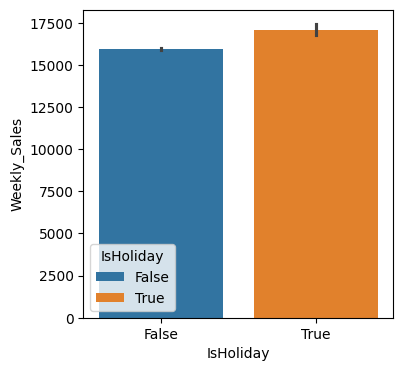

In [40]:
plt.figure(figsize=(4,4))
sns.barplot(x='IsHoliday', y='Weekly_Sales', hue='IsHoliday', data=df)

In [29]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [30]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

Toutes les dates de holiday ne sont pas dans df. 
Il y a 4 holidays :

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Après le 07-Sep-2012, holidays sont dans le test set pour la predication.

Nous avons 10 semaines pour les vacances et 133 semaines non vacances. 

Lorsque nous observons le barplot, on remarque que la moyenne des ventes hebdomadaires pendant les vacances est significativement plus élevée que pendant les jours de non holiday.


Je veux voir les différences de ventes selon le type de holiday. 
J'ai donc créer 4 nouvelles colonnes pour 4 types de holiday et je les ai rempli de valeurs booléennes.
Si la date correspond à ce type de holiday, alors c'est True, sinon False.


In [31]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

In [39]:
# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

In [33]:
# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

In [34]:
#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

<AxesSubplot: xlabel='Christmas', ylabel='Weekly_Sales'>

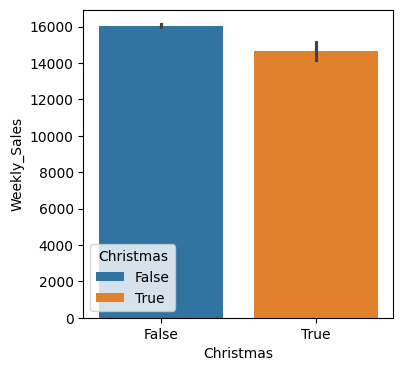

In [38]:
plt.figure(figsize=(4,4))
sns.barplot(x='Christmas', y='Weekly_Sales', hue='Christmas', data=df) # Christmas holiday vs not-Christmas

<AxesSubplot: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

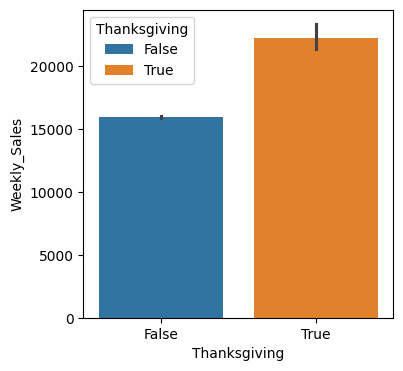

In [41]:
plt.figure(figsize=(4,4))
sns.barplot(x='Thanksgiving', y='Weekly_Sales', hue='Thanksgiving', data=df) # Thanksgiving holiday vs not-thanksgiving

<AxesSubplot: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

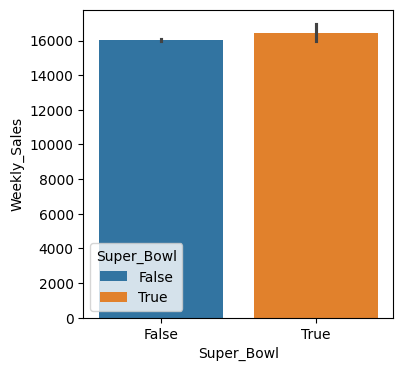

In [42]:
plt.figure(figsize=(4,4))
sns.barplot(x='Super_Bowl', y='Weekly_Sales', hue='Super_Bowl', data=df) # Super bowl holiday vs not-super bowl

<AxesSubplot: xlabel='Labor_Day', ylabel='Weekly_Sales'>

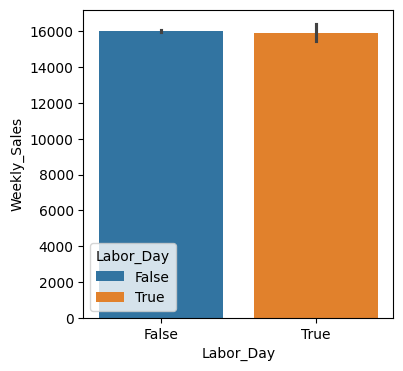

In [43]:
plt.figure(figsize=(4,4))
sns.barplot(x='Labor_Day', y='Weekly_Sales', hue='Labor_Day', data=df) # Labor day holiday vs not-labor day

D'après les graph, Labor Day et Chrismas n'augmentent pas les moyennes de ventes hebdomadaires.

La grande différence est pendant Thanksgiving. Généralement, les gens achètent les cadeaux de noel 1-2 semaines avant Christmas, donc les ventes n'augmentent pas pendant les jours de Christmas, mais avant. Il y a aussi le Black Friday pendant la semaine de Thanksgiving. 

## Les différents types de Stores (A, B, C)

In [44]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas 

Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [45]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day

Labor_Day  Type
False      A       20151.210941
           B       12294.954138
           C        9542.098293
True       A       20004.267422
           B       12084.304642
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [46]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving

Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [47]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl

Super_Bowl  Type
False       A       20138.055908
            B       12286.739293
            C        9536.110508
True        A       20612.757674
            B       12467.035506
            C       10179.271884
Name: Weekly_Sales, dtype: float64

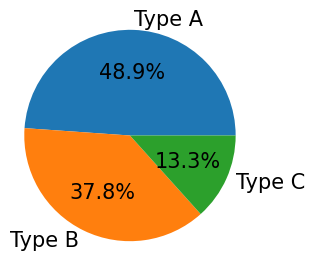

In [53]:
plt.figure(figsize=(3,3))
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

/var/folders/fj/s52dxk7d5zv73fvl_rwf3vgc0000gn/T/ipykernel_8039/2621990641.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


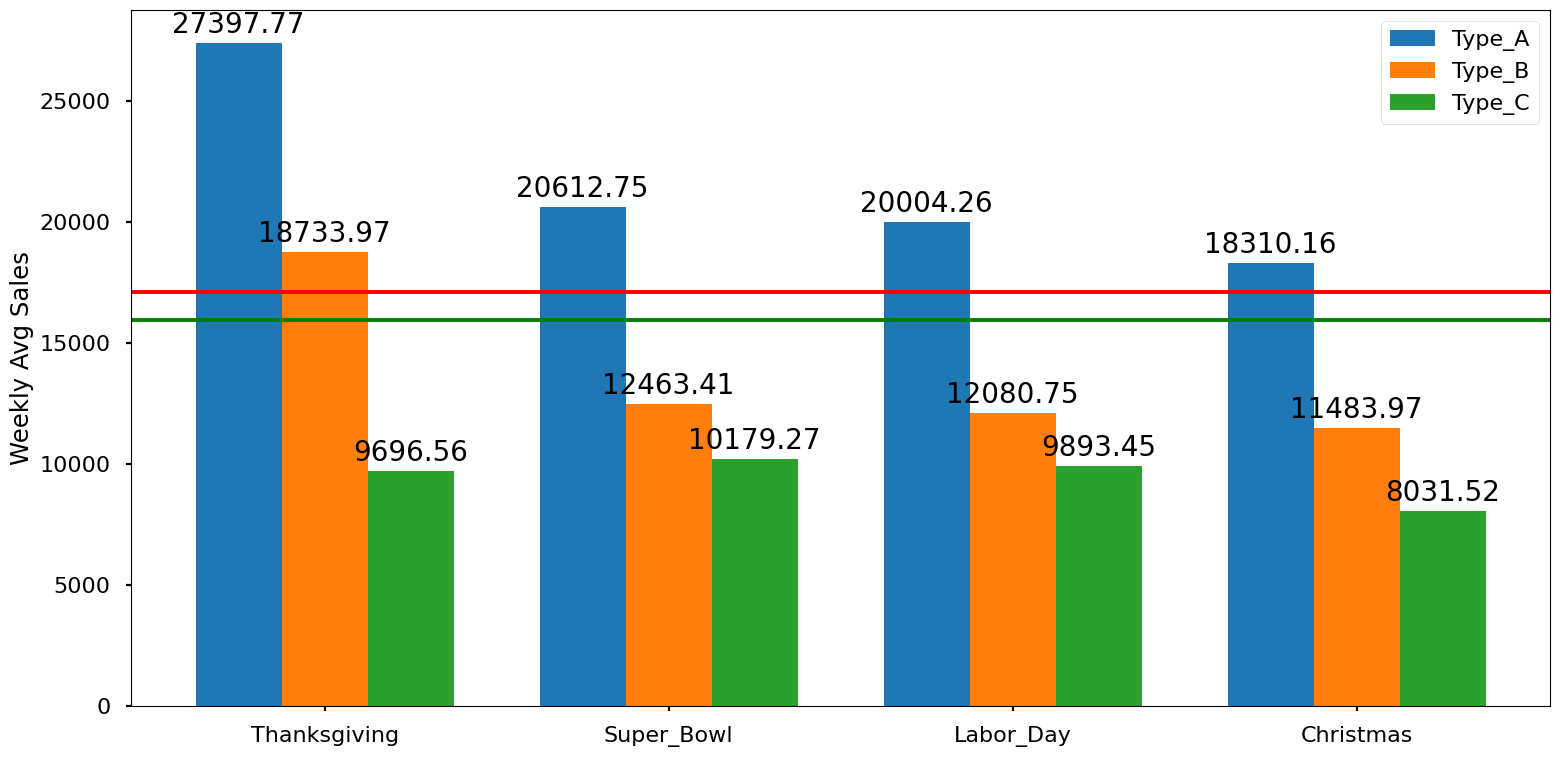

In [54]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

On remarque que la plus haute moyenne des Weekly Sales est pendant la semaine de Thanksgiving. Et pour tous les holidays, le Type A a le plus de ventes.

## Relation entre Size et Type

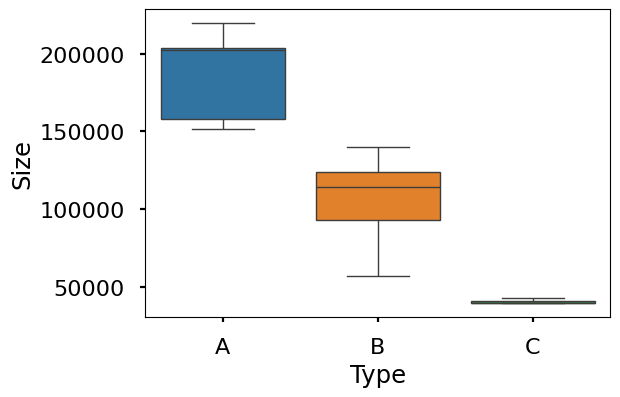

In [58]:
plt.figure(figsize=(6,4)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', hue='Type', data=df, showfliers=False)

Lien entre le type et la taille du Store.
Les plus grands magasins font le plus de ventes.
Les types A correspondent aux grands magasins et C aux petits magasins. 

## Analyse des ventes

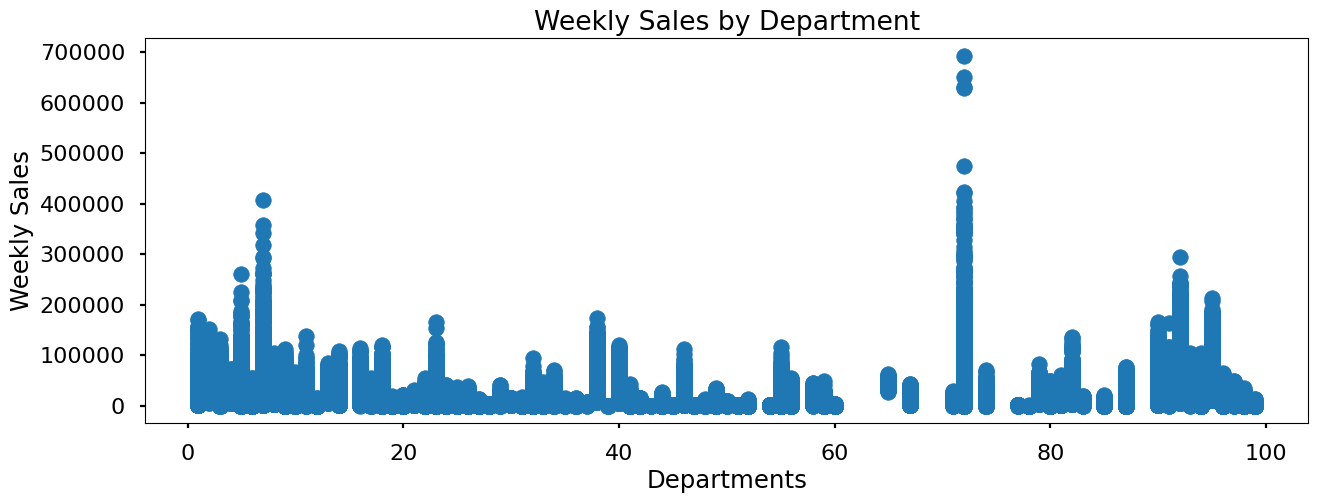

In [62]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

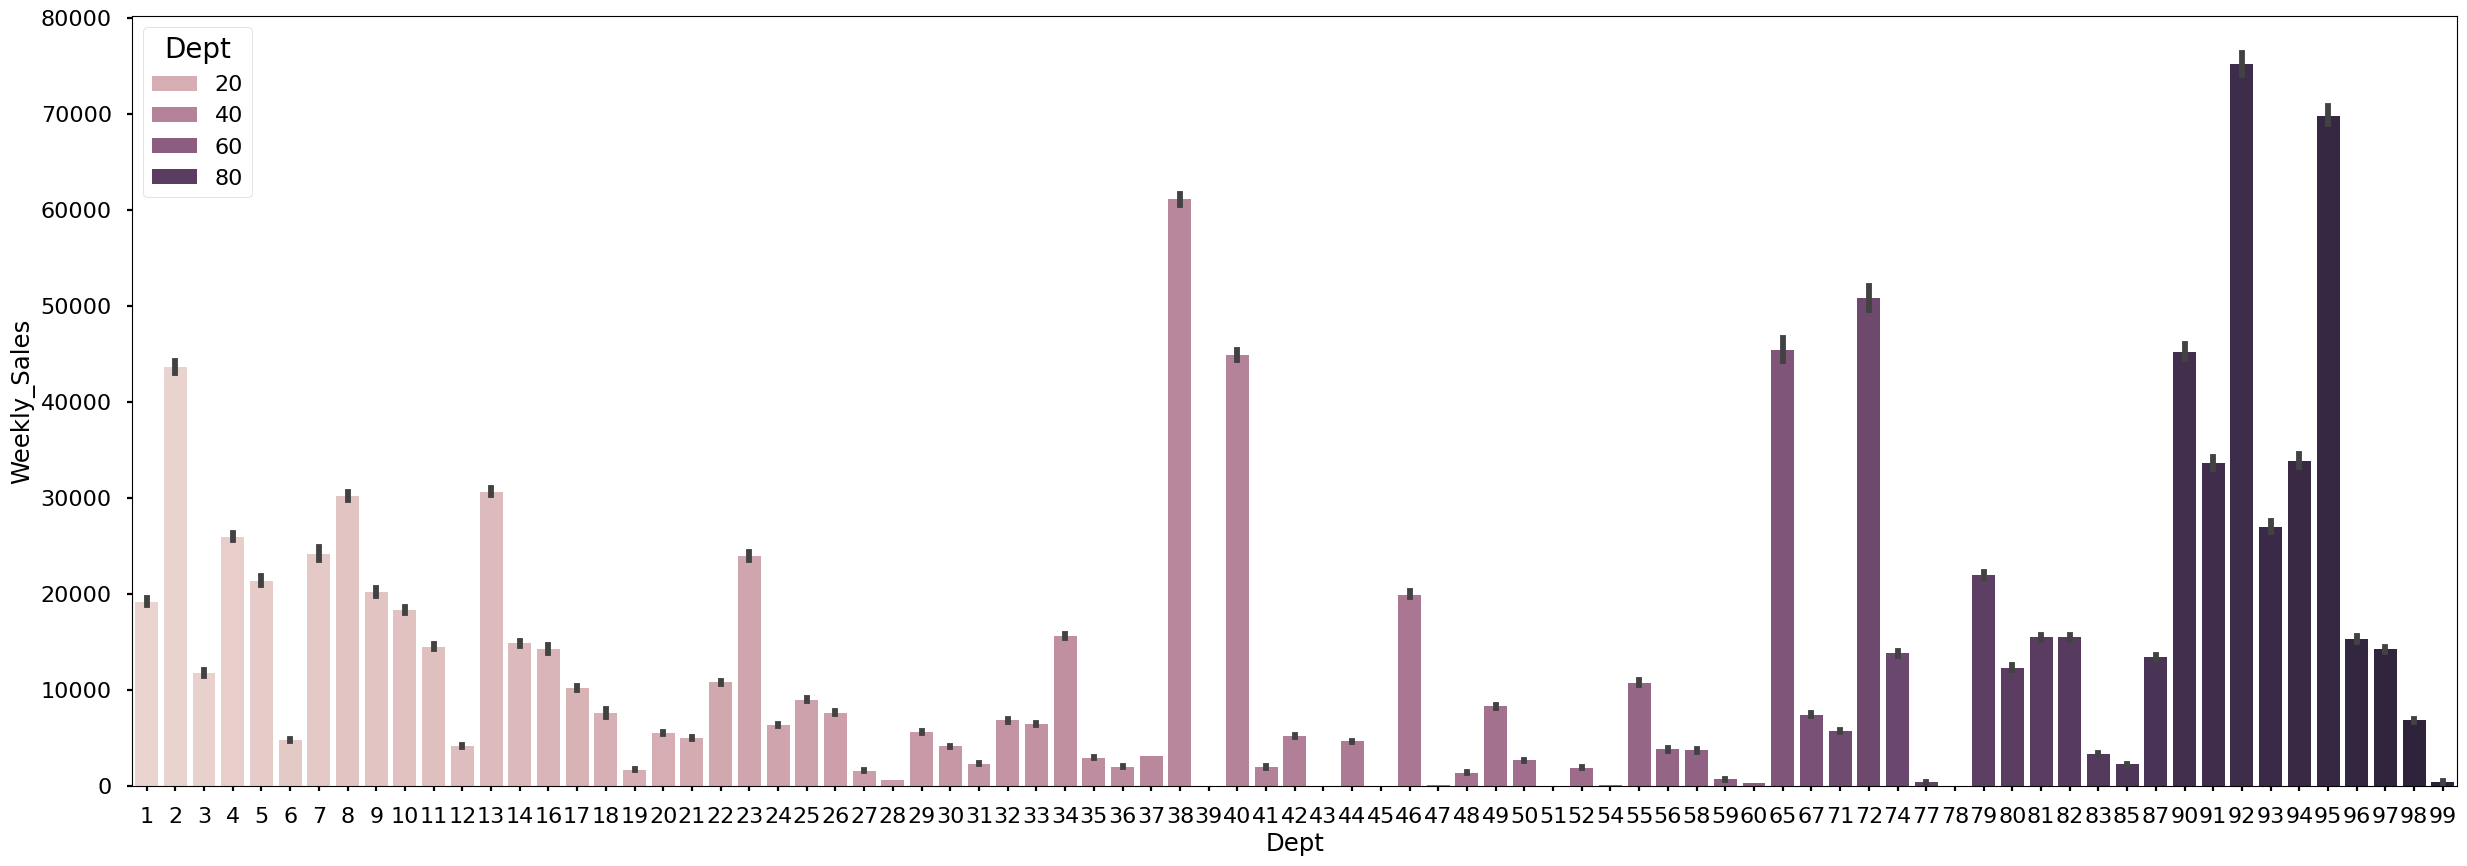

In [61]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', hue='Dept', data=df)

Sur le premier graph on remarque que le département entre 70-75 (disons 72) a le taux de Weekly Sales le plus élevé.
Cependant, sur le deuxième graph on observe la moyenne des Weekly Sales et c'est le département 92 qui a les Weekly Sales les plus élevé.

Cela signifie peut-etre que le département 72 a les meilleures ventes de manière saisonnière. Et en moyenne et général, le département 92 a les meilleur vente dans l'année.

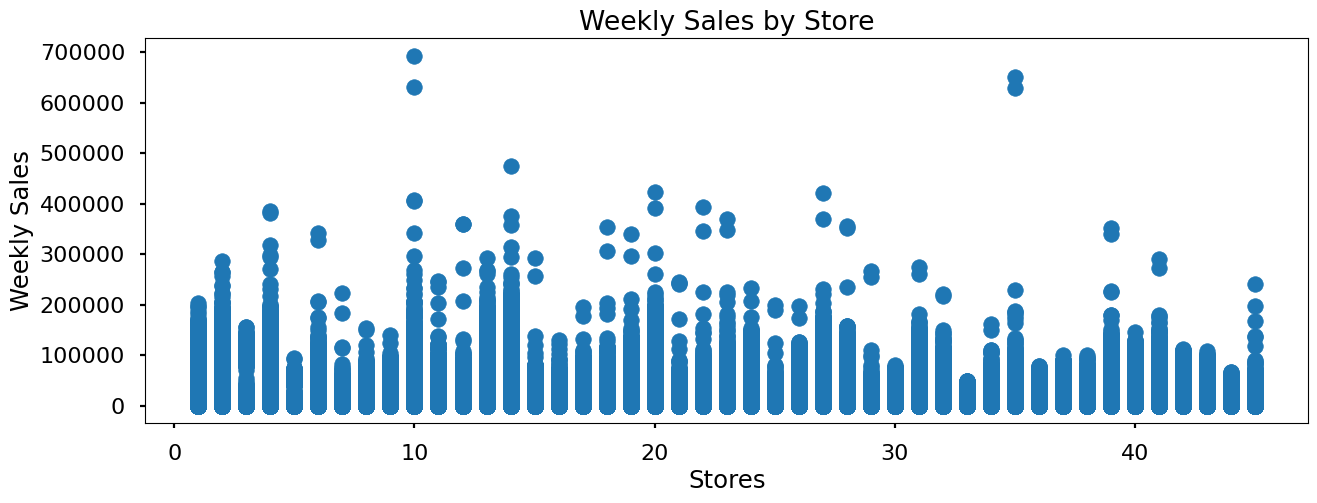

In [63]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

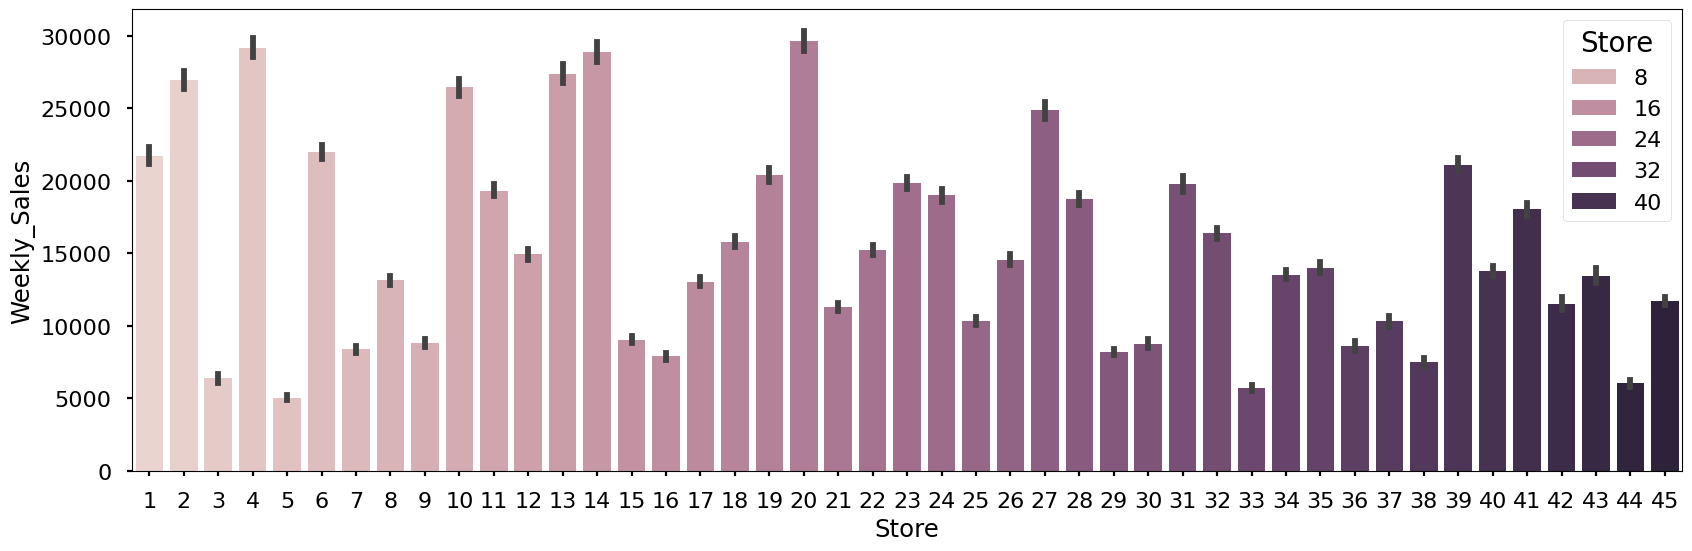

In [64]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', hue='Store', data=df)

Même observation dans les Stores.

## Modification : Date à Datetime et Création de nouvelles colonnes

In [67]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime

In [69]:
df['week'] =df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] =df['Date'].dt.isocalendar().year

In [71]:
df.groupby('month')['Weekly_Sales'].mean().round(2) # to see the best months for sales

month
1     14182.24
2     16048.70
3     15464.82
4     15696.44
5     15845.56
6     16397.61
7     15905.47
8     16113.80
9     15147.22
10    15279.18
11    17534.96
12    19425.80
Name: Weekly_Sales, dtype: float64

<AxesSubplot: xlabel='month'>

<Figure size 600x400 with 0 Axes>

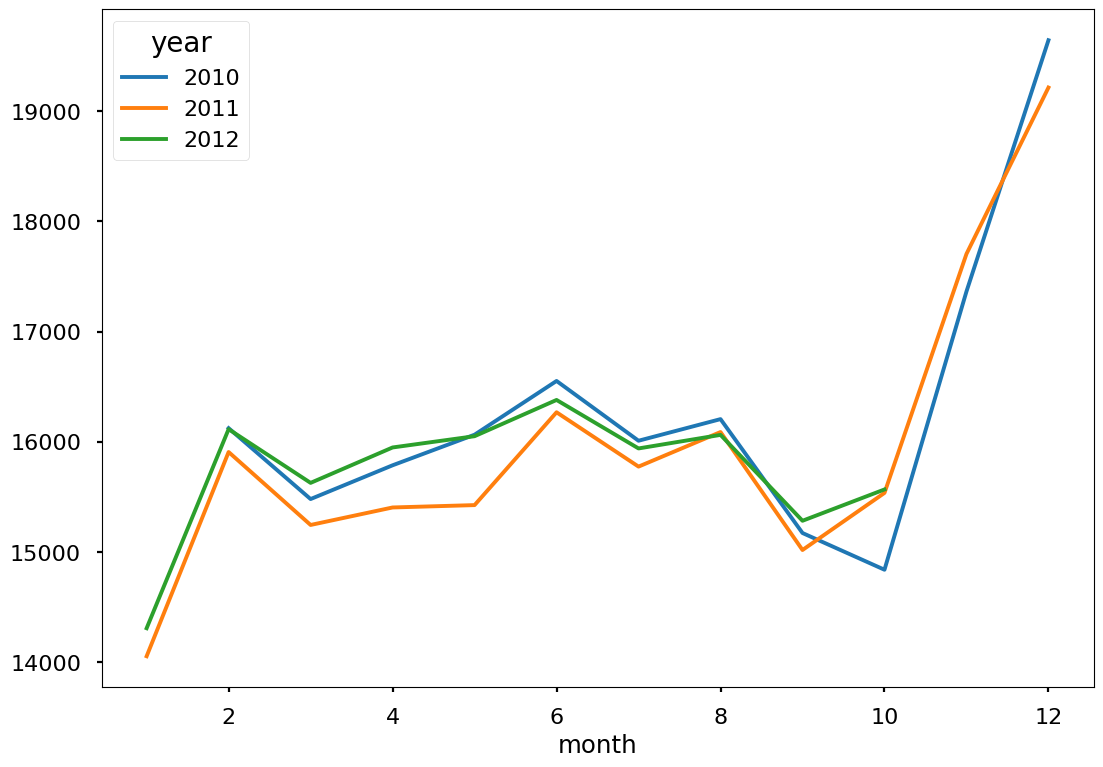

In [74]:
plt.figure(figsize=(6,4))
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

Dans notre dataset, nos données commencent en février 2010 et se terminent en octobre 2012. Il nous manque donc des données de la fin de l'année 2012. 
Ce qu'on peut retirer de ce graph : 
2011 est l'année la plus faible comparé à 2010 et 2012 en terme de ventes.
2012 est l'année la plus évelée si on considère qu'il nous manque les données de fin d'année.

## Les effets des features : Fuel Price, CPI , Unemployment , Temperature sur le Weekly_Sales

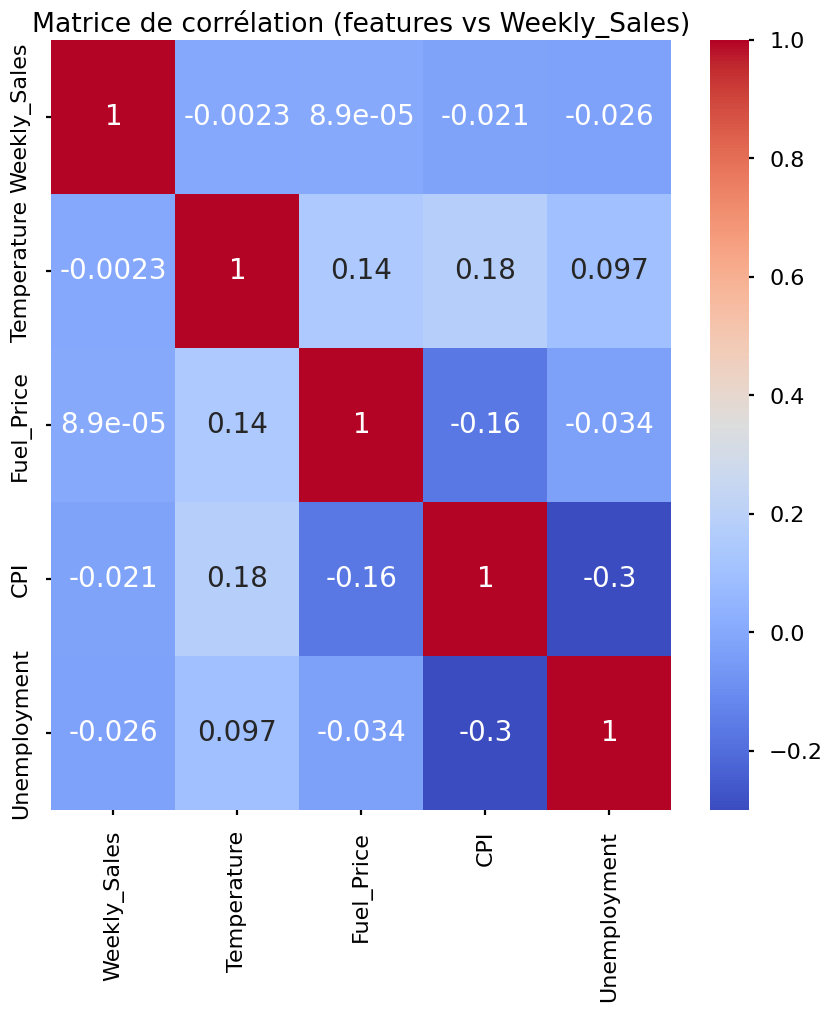

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    'Weekly_Sales','Temperature','Fuel_Price',
    'CPI','Unemployment'
]

df_numeric = df[numeric_cols].copy()  # DataFrame des colonnes d'intérêt

corr_matrix = df_numeric.corr()  # calcule la corrélation de Pearson par défaut

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation (features vs Weekly_Sales)")
plt.show()


Les coefficients sont près de 0 ce qui signifie peu de corrélation entre ces features et le Weekly_Sales.

In [83]:
df.to_csv('clean_data.csv') # assign new data frame to csv for using after here

# Constatations et explorations

## Cleaning Process

- J'ai check toutes les colonnes et pas beaucoup de données manquantes.
- Remplacement des null par 0 dans les colonnes Markdown1-5
- J'ai abandonné 0.3% des lignes avec des Weekly_Sales <= 0


## Constats
- Il y a 45 Stores et 81 Départements
- Departement 72 a la plus haute valeur de Weekly_Sales mais en moyenne c'est le dept 92 qui a le meilleur résultat. Ce sont des valeurs modifiés par les holidays comme Thanksgiving. 
- Les Stores sont divisés en 3 types A, B, C en fonction de la taille du Store. Près de la moitié des 45 stores sont dans la catégorie A >= 150000.
- Les ventes sont corrélé à la taille du magasin, plus le magasin est grand, plus les ventes sont hautes.
- La moyenne des holiday ventes sont au dessus des dates normales.
- Thanksgiving a la valeur la plus haute de ventes car les gens achetent avant noel, et il y a le black friday.
- Le mois de janvier est le plus bas, en conséquences des achats à thanksgiving et noel.
- Les features tels que CPI, temperature, unemployment et fuel price n'ont pas de lien avec le weekly_sales.

## Feature Engineering

- Creation des colonnes week, month, year. La colonne week est une feature importante car notre donnée est hebdomadaire et nous pouvons analyser quelle semaine de l'année on a la plus haute valeur de Weekly_Sales.
- Holidays est divisé en 4 colonnes : Thankgiving, Christmas, Labor Day et Super Bowl pour comparer les effets des différentes holidays.